In [4]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

Lis = [[0,1,2], [0,1,3], [0,2,3], [1,2,3]]

def light_oracle(qc, light_reg, sol_reg, out_reg, initial_lights):
    qc.barrier()
        
    for j in range(len(initial_lights)):
        for k in Lis[j]:
            qc.cx(sol_reg[j], light_reg[k])
    
    qc.x(light_reg)
    qc.mct(light_reg, out_reg)
    qc.x(light_reg)
    
    for j in range(len(initial_lights)):
        for k in Lis[j]:
            qc.cx(sol_reg[j], light_reg[k])
            
    qc.barrier()
        
        
def diffusion(qc, sol_reg):
    qc.h(sol_reg)
    qc.x(sol_reg)
    qc.h(sol_reg[0])
    qc.mct(sol_reg[1:], sol_reg[0])
    qc.h(sol_reg[0])
    qc.x(sol_reg)
    qc.h(sol_reg)
    

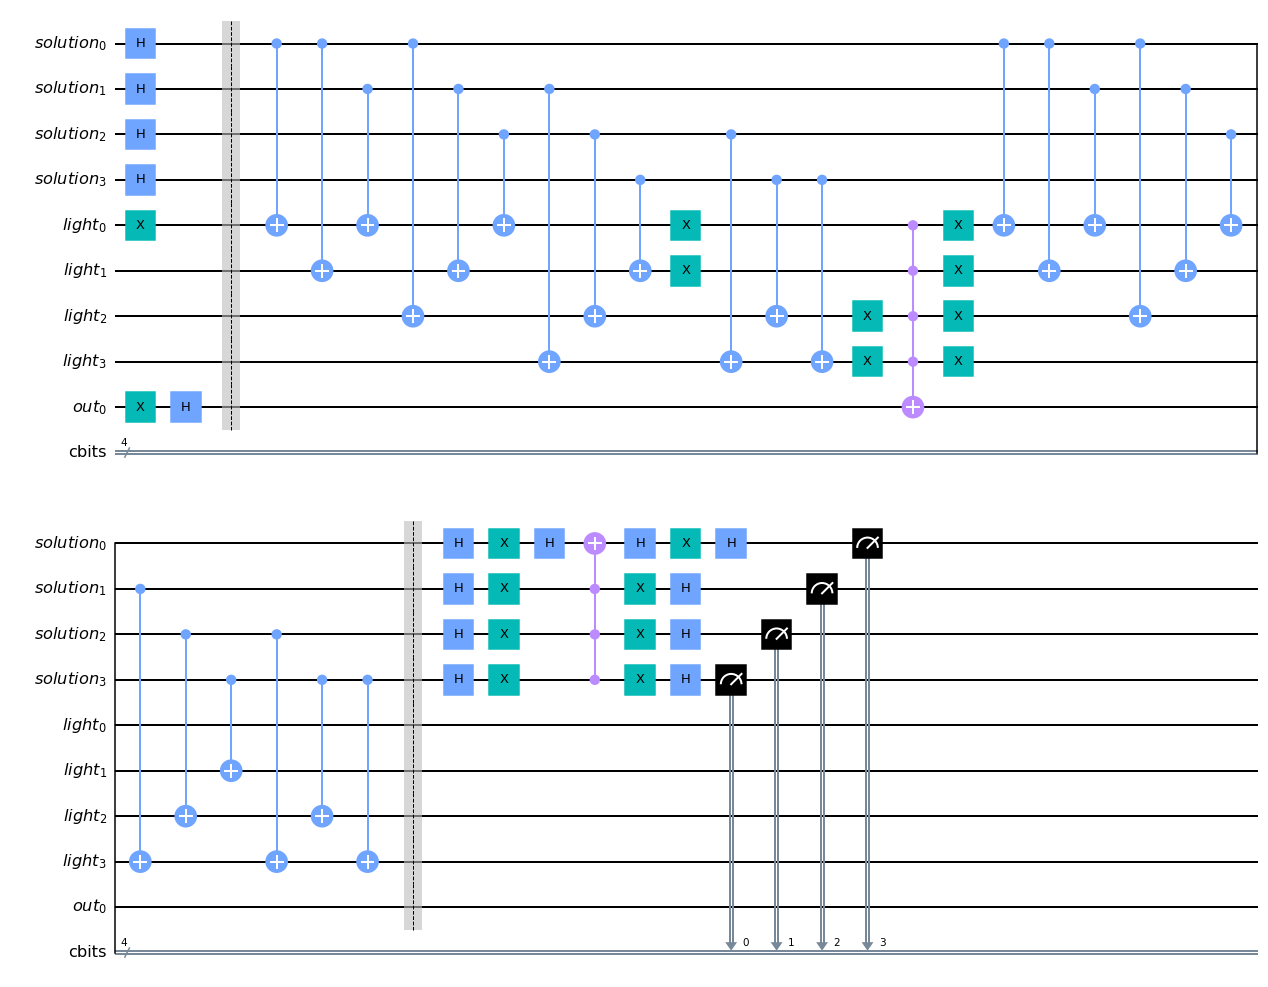

In [7]:
### initial lightsout configration ###
Initial = [1,0,0,0]
prob_size = len(Initial)


### generate a bare quantum cirquit
light_register = QuantumRegister(prob_size, name='light')
sol_register = QuantumRegister(prob_size, name='solution')
out_register = QuantumRegister(1, name='out')
cbits = ClassicalRegister(prob_size, name='cbits')

qc = QuantumCircuit(sol_register, light_register, out_register, cbits)

### preprocessing ###
qc.x(out_register)
qc.h(out_register)
qc.h(sol_register)

for j in range(len(Initial)):
        if Initial[j] == 1:
            qc.x(light_register[j])
            
            
### Grover's seach circuit ###
iters = 1
for trial in range(iters):
    light_oracle(qc, light_register, sol_register, out_register, initial_lights=Initial)
    diffusion(qc, sol_register)

### measurement ###
qc.measure(sol_register[::-1], cbits)
    
qc.draw(output='mpl')

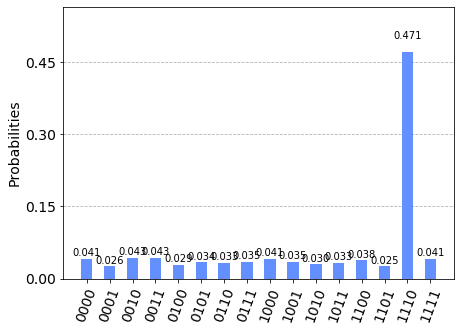

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [4]:
type(answer)

qiskit.result.counts.Counts

In [5]:
[1,2,3,4,5][0:4]

[1, 2, 3, 4]

In [6]:
# pip install qiskit

In [7]:
# pip install pylatexenc